An example of running maf at high spatial resolution on a DDF with the chip gaps on

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles
from lsst.sims.utils import hpid2RaDec, angularSeparation

In [6]:
outDir='temp'
resultsDb = db.ResultsDb(outDir=outDir)
# EXDFS
ddf_RA = 53.125
ddf_dec = -28.-6/60.

In [3]:
dbs = ['ddf_0.23deg_1exp_pairsmix_10yrs.db']

In [12]:
nside = 512
ra, dec = hpid2RaDec(nside, np.arange(hp.nside2npix(nside)))

In [13]:
dist_to_ddf = angularSeparation(ra, dec, ddf_RA, ddf_dec)
radius = 5.  # Degrees
goodhp = np.where(dist_to_ddf <= radius)

In [14]:
goodhp[0].size

5985

In [20]:
conn = db.OpsimDatabase(dbs[0])
bundleList = []
sql = 'filter="r"'
metric = metrics.Coaddm5Metric()
slicer = slicers.UserPointsSlicer(ra=ra[goodhp], dec=dec[goodhp], )

In [21]:
bundleList.append(metricBundles.MetricBundle(metric,slicer,sql))
bd = metricBundles.makeBundlesDictFromList(bundleList)
bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()

Querying database SummaryAllProps with constraint filter="r" for columns ['fieldDec', 'fiveSigmaDepth', 'fieldRA']
Found 581628 visits
Running:  ['opsim_CoaddM5_r_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [25]:
whole_map = np.empty(hp.nside2npix(nside))
whole_map.fill(hp.UNSEEN)
whole_map[goodhp] = bundleList[0].metricValues

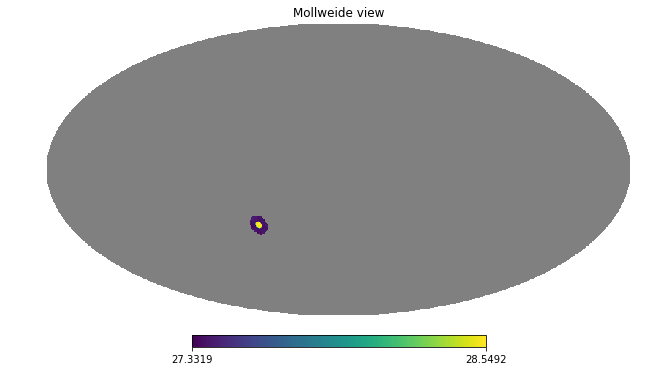

In [26]:
hp.mollview(whole_map)

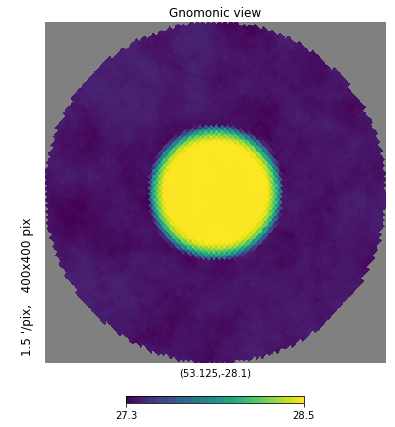

In [28]:
hp.gnomview(whole_map, rot=(ddf_RA, ddf_dec), xsize=400)